In [78]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [80]:
#Load dataset
url = "https://raw.githubusercontent.com/callxpert/datasets/master/Loan-applicant-details.csv"
names = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
dataset = pd.read_csv(url, names=names)

In [81]:
print(dataset.head(20))

     Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
0   LP001003    Male     Yes  ...              1         Rural           N
1   LP001005    Male     Yes  ...              1         Urban           Y
2   LP001006    Male     Yes  ...              1         Urban           Y
3   LP001008    Male      No  ...              1         Urban           Y
4   LP001011    Male     Yes  ...              1         Urban           Y
5   LP001013    Male     Yes  ...              1         Urban           Y
6   LP001014    Male     Yes  ...              0     Semiurban           N
7   LP001018    Male     Yes  ...              1         Urban           Y
8   LP001020    Male     Yes  ...              1     Semiurban           N
9   LP001024    Male     Yes  ...              1         Urban           Y
10  LP001028    Male     Yes  ...              1         Urban           Y
11  LP001029    Male      No  ...              1         Rural           N
12  LP001030    Male     

In [83]:
dataset=dataset.drop(columns=['Loan_ID'])

In [86]:
df_encoded=pd.get_dummies(dataset,drop_first=True)
df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,4583,1508.0,128,360,1,1,1,1,0,0,0,0,0,0,0
1,3000,0.0,66,360,1,1,1,0,0,0,0,1,0,1,1
2,2583,2358.0,120,360,1,1,1,0,0,0,1,0,0,1,1
3,6000,0.0,141,360,1,1,0,0,0,0,0,0,0,1,1
4,5417,4196.0,267,360,1,1,1,0,1,0,0,1,0,1,1


In [89]:
X=df_encoded.drop(columns='Loan_Status_Y')
y=df_encoded['Loan_Status_Y']

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=7)

In [91]:
print("Shape of X_train",train_X.shape)
print("Shape of X_test",test_X.shape)
print("Shape of y_train",train_y.shape)
print("Shape of y_test",test_y.shape)

Shape of X_train (384, 5)
Shape of X_test (96, 5)
Shape of y_train (384,)
Shape of y_test (96,)


In [93]:
from sklearn.tree import DecisionTreeClassifier
model =DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [95]:
from sklearn.tree import DecisionTreeClassifier
mymodel=DecisionTreeClassifier(random_state=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [96]:
#Predicting the values (Scores)
y_pred=model.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0], dtype=uint8)

In [97]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.3333333333333333

In [98]:
df1 =pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})    
df1 

,Actual,Predicted
118,0,1
448,0,1
452,1,0
378,1,1
300,1,1
...,...,...
50,0,0
414,1,1
14,0,0
470,1,0


[Text(108.53145292207792, 211.4, 'X[4] <= 0.5\ngini = 0.415\nsamples = 384\nvalue = [113, 271]'),
 Text(33.69740259740259, 199.32, 'X[1] <= 8115.0\ngini = 0.194\nsamples = 55\nvalue = [49, 6]'),
 Text(22.827272727272728, 187.24, 'X[0] <= 4316.5\ngini = 0.171\nsamples = 53\nvalue = [48, 5]'),
 Text(14.13116883116883, 175.16, 'X[3] <= 240.0\ngini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(9.783116883116882, 163.07999999999998, 'X[0] <= 2546.0\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(5.4350649350649345, 151.0, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(14.13116883116883, 151.0, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(18.47922077922078, 163.07999999999998, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(31.523376623376624, 175.16, 'X[0] <= 5665.0\ngini = 0.308\nsamples = 21\nvalue = [17, 4]'),
 Text(27.175324675324674, 163.07999999999998, 'X[2] <= 146.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(22.827272727272728, 151.0, 'X[12] <= 0.5\ngini = 0

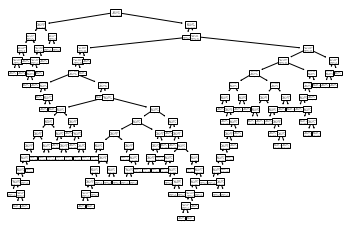

In [104]:
#Tree plotting 
from sklearn import tree
tree.plot_tree(model)

In [105]:
#Decision making in decision tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_4 <= 0.50
|   |--- feature_1 <= 8115.00
|   |   |--- feature_0 <= 4316.50
|   |   |   |--- feature_3 <= 240.00
|   |   |   |   |--- feature_0 <= 2546.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  2546.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  240.00
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  4316.50
|   |   |   |--- feature_0 <= 5665.00
|   |   |   |   |--- feature_2 <= 146.50
|   |   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_12 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  146.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5665.00
|   |   |   |   |--- class: 0
|   |--- feature_1 >  8115.00
|   |   |--- feature_5 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_5 >  0.50
|   |   |   |--- class: 0
|--- feature_4 >  0.50
|   |--- feature_3 <= 48.00
|   |   |--- class: 0
|   |--- feature_3 >

***Thank you so much mam and Goeduhub Technologies***